## Análise Exploratória do dataset SQuAD

In [ ]:
# Montando gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Movendo arquivos do gdrive para a pasta raiz do projeto:
# Dataset de Treinamento
!cp "/content/drive/MyDrive/squad_pt/squad-train-v1.1.json" /content/
# Dataset de Validação
!cp "/content/drive/MyDrive/squad_pt/squad-dev-v1.1.json" /content/
# Função para converter o dataset SQuAD do formato json para dataframe
# Fonte: https://gist.github.com/vgaraujov/fd17b0c151657fbce73189a98617f1c6
!cp "/content/drive/MyDrive/squad_pt/squad_utils_v1.py" /content/

In [ ]:
# Importando função json para dataframe
import squad_utils_v1
# Lendo os datasets de Treinamento e Validação
trein_data = squad_utils_v1.json_to_dataframe('squad-train-v1.1.json')
valid_data = squad_utils_v1.json_to_dataframe('squad-dev-v1.1.json')

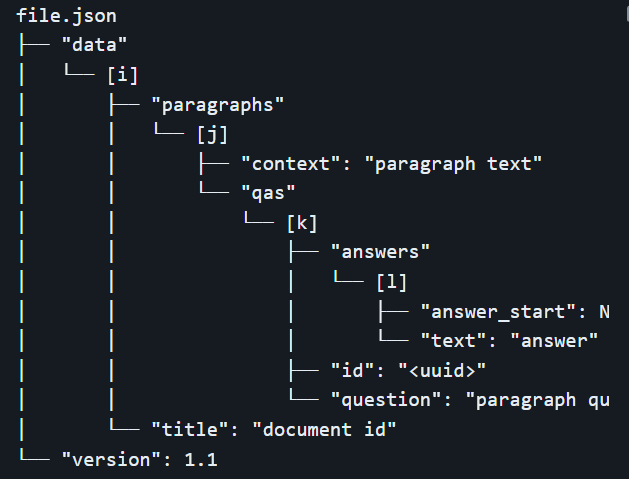

A 1ª versão do conjunto de dados "Stanford Question Answering Dataset" ([SQuAD](https://drive.google.com/file/d/1Q0IaIlv2h2BC468MwUFmUST0EyN7gNkn/view)), para **tarefa de perguntas e respostas extrativas**, foi desenvolvido em 2016. Ele utiliza perguntas geradas a partir de **536 artigos da Wikipedia*** com **mais de 100.000 linhas** de dados. É construído na forma de uma pergunta e um contexto dos artigos da Wikipedia contendo a resposta à pergunta. [[1]](https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1174/reports/2761899.pdf)    
Originalmente este dataset foi construído no idioma inglês, contudo, o grupo [Deep Learning Brasil](http://www.deeplearningbrasil.com.br/) o traduziu automaticamente e fez os ajustes manuais, gastando para isto cerca de 2 meses. [[2]](https://sol.sbc.org.br/index.php/kdmile/article/view/24974)

In [ ]:
# Visão do dataset de treinamento
trein_data.head(2)

,Id,title,context,question,ans_start,text
0,5733be284776f41900661182,University_of_Notre_Dame,"Arquitetonicamente, a escola tem um caráter ca...",A quem a Virgem Maria supostamente apareceu em...,533,Santa Bernadette Soubirous
1,5733be284776f41900661180,University_of_Notre_Dame,"Arquitetonicamente, a escola tem um caráter ca...",A Basílica do Sagrado Coração de Notre Dame fi...,314,o edifício principal


In [ ]:
# Visão do dataset de validação
valid_data.head(2)

,Id,title,context,question,ans_start,text
0,56be4db0acb8001400a502ec,Super_Bowl_50,O Super Bowl 50 foi um jogo de futebol america...,Qual time da NFL representou a AFC no Super Bo...,208,Denver Broncos
3,56be4db0acb8001400a502ed,Super_Bowl_50,O Super Bowl 50 foi um jogo de futebol america...,Qual time da NFL representou a NFC no Super Bo...,295,Carolina Panthers


## Dataset de Treinamento

In [ ]:
# Visão do dataset de treinamento
trein_data.head(2)

,Id,title,context,question,ans_start,text
0,5733be284776f41900661182,University_of_Notre_Dame,"Arquitetonicamente, a escola tem um caráter ca...",A quem a Virgem Maria supostamente apareceu em...,533,Santa Bernadette Soubirous
1,5733be284776f41900661180,University_of_Notre_Dame,"Arquitetonicamente, a escola tem um caráter ca...",A Basílica do Sagrado Coração de Notre Dame fi...,314,o edifício principal


In [ ]:
# Contando a quantidade de valores
trein_data.count()

Id           87510
title        87510
context      87510
question     87510
ans_start    87510
text         87510
dtype: int64

### Todas os 4 registros possuem 87.510 valores, aparentemente, não há dados fantantes! Contudo, podem existir "nan" ou strings vazias " " ...

In [ ]:
# Contados dados none ou nan
trein_data.isna().sum()

Id           0
title        0
context      0
question     0
ans_start    0
text         0
dtype: int64

In [ ]:
# Contados valores vazios (' ')
trein_data.isnull().sum()

Id           0
title        0
context      0
question     0
ans_start    0
text         0
dtype: int64

Realmente, não há dados faltantes!

In [ ]:
# Contando a quantidade de valores únicos
trein_data.nunique()

Id           87510
title          442
context      36815
question     87160
ans_start     1659
text         64571
dtype: int64

### O dataset de treinamento é dividido em 442 assuntos (title). Estes assuntos possuem 36.815 contextos - que são os textos que servem como referência para as respostas às perguntas. Existen 87.160 perguntas (question) e 64.571 respostas (text). A única variável que não possuí dados repetidos é o 'Id'.   
### Uma 1ª questão é por que existem mais perguntas do que respostas? Lembrando que, conforme verificado anteriormente, não há dados faltantes.

In [ ]:
# Visualizando só as perguntas e respostas ...
trein_data[['question','text']]

,question,text
0,A quem a Virgem Maria supostamente apareceu em...,Santa Bernadette Soubirous
1,A Basílica do Sagrado Coração de Notre Dame fi...,o edifício principal
2,O que fica no topo do edifício principal em No...,uma estátua de ouro da Virgem Maria
3,Com que frequência o Malabarista de Notre Dame...,duas vezes
4,Quantos jornais de estudantes são encontrados ...,três
...,...,...
87505,Qual é o outro nome para o culto aos antepassa...,culto a Ajima
87506,Quem ajudou o Nepal a reformar o Estádio Dasar...,chinês
87507,Por que viajar em Catmandu é principalmente de...,terreno acidentado
87508,Quem opera voos entre Catmandu e Istambul?,companhias aéreas turcas


### Observando as respostas (text) nota-se que muitas delas são comuns para várias perguntas, como por exemplo: "Em que ano o primeiro país comunista abriu suas fronteiras a todos os visitantes estrangeiros?"; "Quando Tito começou a promover uma resolução pacífica para o conflito árabe-israelense?"; e "Em que ano Tito começou a trabalhar nos processos de paz israelense árabe?", onde o ano de 1967 responde todas elas. Assim, isto explica termos mais perguntas que respostas únicas!

In [ ]:
# Dos 442 assuntos, como os 36.815 contextos estão distribuidos?
# Agrupando os contextos por assuntos (title)
title_context = trein_data.groupby('title')[['context']]
# Verificando as assuntos com mais contextos
title_context.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=False).head(3)

,QdeContext
title,
New_York_City,817
American_Idol,802
Beyoncé,756


In [ ]:
# Verificando as assuntos com menos contextos
title_context.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=True).head(3)

,QdeContext
title,
Myocardial_infarction,22
Matter,24
Pitch_(music),36


In [ ]:
# Importando a bliblioteca para NLP
import spacy
import spacy.cli
spacy.cli.download("pt_core_news_sm")
nlp = spacy.load('pt_core_news_sm')

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Criando um dataframe só com os contextos
contexts = trein_data['context']
# Criando uma lista com os contextos únicos
contexts_unico = list(set(contexts))

In [ ]:
# Intera toda a lista de contextos calculando a quantidade de tokens de cada um deles
contexts_unico_total_tokens = [len(nlp(item))for item in contexts_unico]

In [ ]:
import pandas as pd
# Cria novo dataframe com os contextos e suas quantidades de tokens
contexto_QdeTokens_trein = pd.DataFrame(list(zip(contexts_unico,
                                           contexts_unico_total_tokens)), columns=['Contexto', 'QdeTokens'])

In [ ]:
# Salva arquivo no disco
contexto_QdeTokens_trein.to_csv('contexto_QdeTokens_trein.csv', encoding='utf-8')
!cp contexto_QdeTokens_trein.csv "/content/drive/MyDrive/squad_pt/contexto_QdeTokens_trein.csv"

In [ ]:
# Análise descritiva geral
contexto_QdeTokens_trein.describe()

,QdeTokens
count,36815.000000
mean,141.512536
std,59.547506
min,22.000000
25%,105.000000
50%,130.000000
75%,168.000000
max,854.000000


### Dos 36.815 valores únicos de contextos, o média de tokens é aproximadamente 142 tokens, com desvio padrão de aproximadamente 60 tokens.
### O contexto mais curto possui 22 tokens, o mais longo possui 854 tokens. A mediana de tokens é 130.

## Dataset de Validação

In [ ]:
# Visão do dataset de validação
valid_data.head(2)

,Id,title,context,question,ans_start,text
0,56be4db0acb8001400a502ec,Super_Bowl_50,O Super Bowl 50 foi um jogo de futebol america...,Qual time da NFL representou a AFC no Super Bo...,208,Denver Broncos
3,56be4db0acb8001400a502ed,Super_Bowl_50,O Super Bowl 50 foi um jogo de futebol america...,Qual time da NFL representou a NFC no Super Bo...,295,Carolina Panthers


In [ ]:
# Contando a quantidade de valores
valid_data.count()

Id           17853
title        17853
context      17853
question     17853
ans_start    17853
text         17853
dtype: int64

### Todas os 4 registros possuem 17.853 valores, aparentemente, não há dados fantantes! Contudo, podem existir "nan", verificando ...

In [ ]:
# Contados dados none ou nan
valid_data.isna().sum()

Id           0
title        0
context      0
question     0
ans_start    0
text         0
dtype: int64

In [ ]:
# Contados valores vazios (' ')
valid_data.isnull().sum()

Id           0
title        0
context      0
question     0
ans_start    0
text         0
dtype: int64

Realmente, não há dados fantantes!

In [ ]:
# Contando a quantidade de valores únicos
valid_data.nunique()

Id           10570
title           48
context       5644
question     10521
ans_start     1344
text         14545
dtype: int64

### O dataset de validação é dividido em 48 assuntos (title). Estes assuntos possuem 5.644 contextos. Existem 10.521 perguntas (question) e 14.545 respostas (text).
### Diferentemente do conjunto de treino, aqui existem mais respostas do que perguntas, por que?

In [ ]:
# Visualizando só as perguntas e respostas ...
valid_data[['question','text']]

,question,text
0,Qual time da NFL representou a AFC no Super Bo...,Denver Broncos
3,Qual time da NFL representou a NFC no Super Bo...,Carolina Panthers
6,Onde aconteceu o Super Bowl 50?,"Santa Clara, Califórnia"
7,Onde aconteceu o Super Bowl 50?,Levi's Stadium na área da Baía de São Francisc...
8,Qual time da NFL venceu o Super Bowl 50?,Denver Broncos
...,...,...
34720,"Tensão, compressão e arrasto são que tipo de f...",não conservador
34722,Qual é a lei da termodinâmica associada à troc...,Segunda lei da termodinâmica
34723,Qual é a lei da termodinâmica associada à troc...,Segunda lei
34724,Qual é o termo métrico menos usado que o Newton?,libra-força


### Observando as questões nota-se que muitas delas são identicas, só mudando a resposta, por exemplo: respondendo em valores numéricos ou por extenso. Assim, isto explica termos mais respostas que perguntas.

In [ ]:
# Dos 48 assuntos, como os 5.644 contextos estão distribuidos?
# Agrupando os contextos por assuntos (title)
title_context = valid_data.groupby('title')[['context']]
# Verificando as assuntos com mais contextos
title_context.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=False).head(3)

,QdeContext
title,
Super_Bowl_50,1349
Martin_Luther,874
Nikola_Tesla,820


In [ ]:
# Verificando as assuntos com menos contextos
title_context.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=True).head(3)

,QdeContext
title,
Construction,151
"Jacksonville,_Florida",156
Private_school,159


In [ ]:
# Criando um dataframe só com os contextos
contexts = valid_data['context']
# Criando uma lista com os contextos únicos
contexts_unico = list(set(contexts))

In [ ]:
# Intera toda a lista de contextos calculando a quantidade de tokens de cada um deles
contexts_unico_total_tokens = [len(nlp(item))for item in contexts_unico]

In [ ]:
# Cria novo dataframe com os contextos e suas quantidades de tokens
contexto_QdeTokens_valid = pd.DataFrame(list(zip(contexts_unico,
                                           contexts_unico_total_tokens)), columns=['Contexto', 'QdeTokens'])

In [ ]:
# Salva arquivo no disco
contexto_QdeTokens_valid.to_csv('contexto_QdeTokens_valid.csv', encoding='utf-8')
!cp contexto_QdeTokens_valid.csv "/content/drive/MyDrive/squad_pt/contexto_QdeTokens_valid.csv"

In [ ]:
# Análise descritiva geral
contexto_QdeTokens_valid.describe()

,QdeTokens
count,5644.000000
mean,148.026931
std,65.431934
min,26.000000
25%,109.000000
50%,135.000000
75%,173.000000
max,749.000000


### Dos 5.644 valores únicos de contextos, a média de tokens é aproximadamente 148 tokens, com desvio padrão de aproximadamente 65 tokens.
### O contexto mais curto possui 26 tokens, o mais longo possui 749 tokens. A mediana de tokens é 135.

## Conclusões

Conforme verificado acima, são fornecidos dois arquivos: **squad-train-v1.1.json** e  **squad-dev-v1.1.json**, sendo o primeiro para treinamento e o segundo para validação.   
Os arquivos possuem, respectivamente, as seguintes quantidades de registros: 87.510 e 17.853, totalizando assim: 105.363 registros. Percentualmente isto equivale a 83% dos dados para treinamento e 17% dos dados para validação.   
No universo de Machine Learning, é comum a divisão dos datasets em: Treinamento; Validação; e Testes. Assim, por que aqui não foi fornecido os dados de Testes?   
Pesquisando em [[1]](https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1174/reports/2761899.pdf), temos:
> "[...] Utilizamos 80% do conjunto de dados para treinar o modelo, 10% para validação e ajuste hiperparâmetro. **Os 10% finais do conjunto de dados são reservados para testes** e **mantidos privados** pelos criadores da equipe com o objetivo de preservar a integridade dos modelos de resposta a perguntas."    

Portanto, **os autores não disponibilizaram os 10% de dados para testes**. Sendo assim, **o grupo vai desenvolver duas estratégias:**
  - 1ª) Juntar os dados de treinamento e validação e depois redividi-los aleatoriamente em Treinamento (80%), Validação (10%) e Testes (10%);
  - 2ª) Manter os dados originais de treinamento e dividir o conjunto de validação em duas partes: validação (10 mil registros (9,5%) dos dados) e testes (7853 registros (7,4%) dos dados).
  
Com relação à **quantidade máxima** de tokens identificada no campo contexto, temos: **854 tokens** para o conjunto de treinamento e **749 tokens** para o conjunto de validação. Assim, aparentemente não teremos problemas, uma vez que o SLM [Phi-2](https://huggingface.co/microsoft/phi-2) possui [Context length](https://symbl.ai/developers/blog/guide-to-context-in-llms/) de **2048 tokens**.


## 1ª Estratégia - Reajustando o dataset

In [ ]:
# Unindo os datasets de treinamento e validação
dataset = pd.concat([trein_data, valid_data])

In [ ]:
# Redefinindo o dataset
# 80% Treinamento, 10% Validação e 10% Testes
# https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test/38251213#38251213
import numpy as np
train, validate, test = np.split(dataset.sample(frac=1, random_state=42),[int(.8*len(dataset)), int(.9*len(dataset))])

In [ ]:
print("Total de dados: ", len(dataset))

Total de dados:  105363


In [ ]:
print("Percentual de dados treinamento: ", round(len(train)/len(dataset)*100,1))

Percentual de dados treinamento:  80.0


In [ ]:
print("Percentual de dados validação: ", round(len(validate)/len(dataset)*100,1))

Percentual de dados validação:  10.0


In [ ]:
print("Percentual de dados testes: ", round(len(test)/len(dataset)*100,1))

Percentual de dados testes:  10.0


Será que os dados ficaram balanceados, isto é, os assuntos (title) estão distribuidos em todas as 3 partições de dados?

In [ ]:
train['title'].nunique()

490

In [ ]:
validate['title'].nunique()

490

In [ ]:
test['title'].nunique()

489

Conforme observado acima, sim, os dados estão balenceados!

In [ ]:
# Salva arquivo no disco
train.to_csv('squad_BR_train.csv', encoding='utf-8', index = False)
!cp squad_BR_train.csv "/content/drive/MyDrive/squad_pt/squad_BR_train.csv"
validate.to_csv('squad_BR_valid.csv', encoding='utf-8', index = False)
!cp squad_BR_valid.csv "/content/drive/MyDrive/squad_pt/squad_BR_valid.csv"
test.to_csv('squad_BR_test.csv', encoding='utf-8', index = False)
!cp squad_BR_test.csv "/content/drive/MyDrive/squad_pt/squad_BR_test.csv"

In [ ]:
# Como os contextos estão distribuidos nas partições de dados?
# Agrupando os contextos por assuntos (title)
title_context_train = train.groupby('title')[['context']]
# Verificando as assuntos com mais contextos
title_context_train.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=False).head(5)

,QdeContext
title,
Super_Bowl_50,1066
Martin_Luther,693
New_York_City,659
Nikola_Tesla,650
American_Idol,633


In [ ]:
# Agrupando os contextos por assuntos (title)
title_context_validate = validate.groupby('title')[['context']]
# Verificando as assuntos com mais contextos
title_context_validate.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=False).head(5)

,QdeContext
title,
Super_Bowl_50,154
New_York_City,87
American_Idol,86
Martin_Luther,85
Nikola_Tesla,82


In [ ]:
# Agrupando os contextos por assuntos (title)
title_context_test = test.groupby('title')[['context']]
# Verificando as assuntos com mais contextos
title_context_test.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=False).head(5)

,QdeContext
title,
Super_Bowl_50,129
Martin_Luther,96
Nikola_Tesla,88
American_Idol,83
Beyoncé,81


*Os* top 5 assuntos, praticamente foram os mesmos nas 3 partições de dados!

In [ ]:
# Criando um dataframe só com os contextos
contexts = train['context']
# Criando uma lista com os contextos únicos
contexts_unico = list(set(contexts))

In [ ]:
# Intera toda a lista de contextos calculando a quantidade de tokens de cada um deles
contexts_unico_total_tokens = [len(nlp(item))for item in contexts_unico]

In [ ]:
# Cria novo dataframe com os contextos e suas quantidades de tokens
contexto_QdeTokens_train = pd.DataFrame(list(zip(contexts_unico,
                                           contexts_unico_total_tokens)), columns=['Contexto', 'QdeTokens'])

In [ ]:
# Análise descritiva geral
contexto_QdeTokens_train.describe()

,QdeTokens
count,35806.000000
mean,142.480953
std,60.150553
min,22.000000
25%,105.000000
50%,131.000000
75%,169.000000
max,854.000000


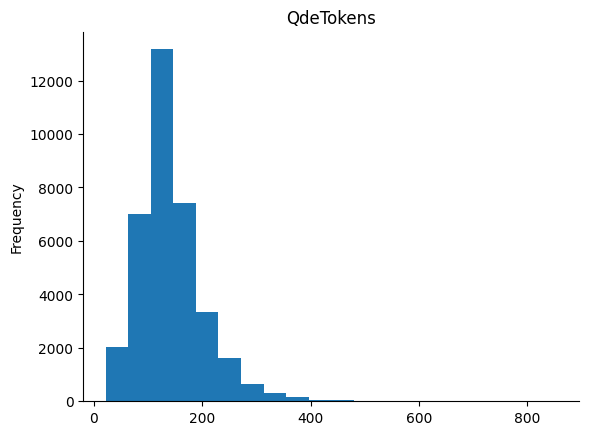

In [ ]:
# Histograma da distribuição de tokens
from matplotlib import pyplot as plt
contexto_QdeTokens_train['QdeTokens'].plot(kind='hist', bins=20, title='QdeTokens')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Conforme histograma acima, 400 tokens atendem a grande maioria dos casos.  
**Detalhe: quanto menor este valor menos poder computacional é exigido no processo de ajuste fino!**

### Os 3 arquivos csv gerados incorporados na plataforma [hunggingface](https://huggingface.co/datasets/vsvasconcelos/SQuAD-pt_BR-V1.1)



In [ ]:
# Importando o dataset do huggingface
!pip install datasets
from datasets import load_dataset

dataset = load_dataset("vsvasconcelos/SQuAD-pt_BR-V1.1")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 84290
    })
    validation: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 10536
    })
    test: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 10537
    })
})

## 2ª Estratégia - Reajustando os dados de validação

In [ ]:
# O dataset de treinamento é preservado!
train = trein_data

In [ ]:
# Pegando as 1ª 10K linhas para validação
validate = valid_data[:10000]
validate.head(1)

,Id,title,context,question,ans_start,text
0,56be4db0acb8001400a502ec,Super_Bowl_50,O Super Bowl 50 foi um jogo de futebol america...,Qual time da NFL representou a AFC no Super Bo...,208,Denver Broncos


In [ ]:
validate.tail(1)

,Id,title,context,question,ans_start,text
19427,572746d3dd62a815002e9a69,American_Broadcasting_Company,"Em abril de 1970, o Congresso aprovou a Lei de...",Quem foi nomeado presidente e CEO da ABC depoi...,398,Regra de Elton


In [ ]:
len(validate)

10000

In [ ]:
# Pegando o restante dos dados originais de validação para testes
test = valid_data[10000:]

In [ ]:
test.head(1)

,Id,title,context,question,ans_start,text
19430,572747dd5951b619008f87aa,American_Broadcasting_Company,"No início dos anos 70, Michael Eisner, que ing...",Que série ABC se originou como um segmento cur...,185,Dias felizes


In [ ]:
test.tail(1)

,Id,title,context,question,ans_start,text
34725,5737aafd1c456719005744fb,Force,A força da libra tem uma contrapartida métrica...,Qual é o termo métrico menos usado que o Newton?,77,o quilograma-força (


In [ ]:
len(test)

7853

In [ ]:
total_dados = len(train) + len(validate) + len(test)

In [ ]:
print("Total de dados: ", total_dados)

Total de dados:  105363


In [ ]:
print("Percentual de dados treinamento: ", round(len(train)/total_dados*100,0))

Percentual de dados treinamento:  83.0


In [ ]:
print("Percentual de dados validação: ", round(len(validate)/total_dados*100,1))

Percentual de dados validação:  9.5


In [ ]:
print("Percentual de dados de testes: ", round(len(test)/total_dados*100,1))

Percentual de dados de testes:  7.5


In [ ]:
train['title'].nunique()

442

In [ ]:
validate['title'].nunique()

25

In [ ]:
test['title'].nunique()

24

In [ ]:
# Como os contextos estão distribuidos nas partições de dados?
# Agrupando os contextos por assuntos (title)
title_context_train = train.groupby('title')[['context']]
# Verificando as assuntos com mais contextos
title_context_train.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=False).head(5)

,QdeContext
title,
New_York_City,817
American_Idol,802
Beyoncé,756
Frédéric_Chopin,697
Queen_Victoria,680


In [ ]:
# Agrupando os contextos por assuntos (title)
title_context_validate = validate.groupby('title')[['context']]
# Verificando as assuntos com mais contextos
title_context_validate.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=False).head(5)

,QdeContext
title,
Super_Bowl_50,1349
Martin_Luther,874
Nikola_Tesla,820
Apollo_program,538
Oxygen,482


In [ ]:
# Agrupando os contextos por assuntos (title)
title_context_test = test.groupby('title')[['context']]
# Verificando as assuntos com mais contextos
title_context_test.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=False).head(5)

,QdeContext
title,
Chloroplast,529
Civil_disobedience,505
Economic_inequality,477
Rhine,468
French_and_Indian_War,453


Os top 5 assuntos, são totalmente diferentes em cada um dos conjuntos de dados!

In [ ]:
# Criando um dataframe só com os contextos
contexts = train['context']
# Criando uma lista com os contextos únicos
contexts_unico = list(set(contexts))

In [ ]:
# Intera toda a lista de contextos calculando a quantidade de tokens de cada um deles
contexts_unico_total_tokens = [len(nlp(item))for item in contexts_unico]

In [ ]:
# Cria novo dataframe com os contextos e suas quantidades de tokens
contexto_QdeTokens_train = pd.DataFrame(list(zip(contexts_unico,
                                           contexts_unico_total_tokens)), columns=['Contexto', 'QdeTokens'])

In [ ]:
# Análise descritiva geral
contexto_QdeTokens_train.describe()

,QdeTokens
count,36815.000000
mean,141.512536
std,59.547506
min,22.000000
25%,105.000000
50%,130.000000
75%,168.000000
max,854.000000


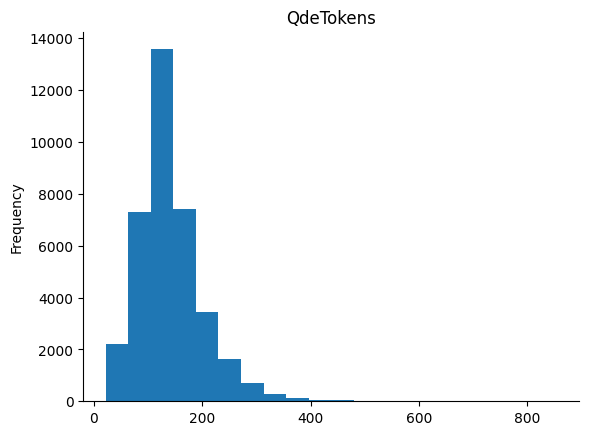

In [ ]:
contexto_QdeTokens_train['QdeTokens'].plot(kind='hist', bins=20, title='QdeTokens')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Salva arquivo no disco
train.to_csv('squad_BR_train_.csv', encoding='utf-8', index = False)
!cp squad_BR_train_.csv "/content/drive/MyDrive/squad_pt/squad_BR_train_.csv"
validate.to_csv('squad_BR_valid_.csv', encoding='utf-8', index = False)
!cp squad_BR_valid_.csv "/content/drive/MyDrive/squad_pt/squad_BR_valid_.csv"
test.to_csv('squad_BR_test_.csv', encoding='utf-8', index = False)
!cp squad_BR_test_.csv "/content/drive/MyDrive/squad_pt/squad_BR_test_.csv"


### Os 3 arquivos csv gerados incorporados na plataforma [hunggingface](https://huggingface.co/datasets/vsvasconcelos/SQuAD-pt_BR-V1.1_)

In [ ]:
# Importando o dataset do huggingface
#!pip install datasets
from datasets import load_dataset
dataset_v1_pt = load_dataset("vsvasconcelos/SQuAD-pt_BR-V1.1_")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset_v1_pt

DatasetDict({
    train: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text', 'context_length'],
        num_rows: 87510
    })
    validation: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text', 'context_length'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text', 'context_length'],
        num_rows: 7853
    })
})

In [ ]:
# Examinando uma amostra (500) aleatória dos dados
train_sample = dataset_v1_pt["train"].shuffle(seed=42).select(range(500))

In [ ]:
# Verificando um dado da amostra
train_sample[72]

{'Id': '56e09d01231d4119001ac2d3',
 'title': 'Hydrogen',
 'context': 'Um próton nu, H +, não pode existir em solução ou em cristais iônicos, devido à sua atração incontrolável por outros átomos ou moléculas com elétrons. Exceto nas altas temperaturas associadas aos plasmas, esses prótons não podem ser removidos das nuvens de elétrons de átomos e moléculas e permanecerão ligados a eles. No entanto, o termo \'próton\' é às vezes usado de maneira vaga e metaforicamente para se referir ao hidrogênio catiônico ou carregado positivamente ligado a outras espécies dessa maneira e, como tal, é denotado "H +" sem nenhuma implicação de que prótons existam livremente como espécie.',
 'question': 'Qual é outro termo para um próton nu?',
 'ans_start': 14,
 'text': 'H +'}

In [ ]:
# Quantidade de titles
len(dataset_v1_pt["train"].unique('title'))

442

In [ ]:
# Quantidade de tokens do campo context
def compute_context_length(example):
    return {"context_length": len(example["context"].split())}

In [ ]:
dataset_v1_pt = dataset_v1_pt.map(compute_context_length)
# Inspect the first training example
dataset_v1_pt["train"][0]

Map:   0%|          | 0/87510 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7853 [00:00<?, ? examples/s]

{'Id': '5733be284776f41900661182',
 'title': 'University_of_Notre_Dame',
 'context': 'Arquitetonicamente, a escola tem um caráter católico. No topo da cúpula de ouro do edifício principal está uma estátua de ouro da Virgem Maria. Imediatamente em frente ao edifício principal e de frente para ele, está uma estátua de Cristo de cobre com os braços erguidos com a lenda "Venite Ad Me Omnes". Ao lado do edifício principal é a Basílica do Sagrado Coração. Imediatamente atrás da basílica fica a Gruta, um local mariano de oração e reflexão. É uma réplica da gruta de Lourdes, na França, onde a Virgem Maria apareceu para Santa Bernadette Soubirous em 1858. No final da estrada principal (e em uma linha direta que liga três estátuas ao Domo de Ouro), existe uma estátua de pedra simples e moderna de Maria.',
 'question': 'A quem a Virgem Maria supostamente apareceu em 1858 em Lourdes, França?',
 'ans_start': 533,
 'text': 'Santa Bernadette Soubirous',
 'context_length': 126}

<Axes: title={'center': 'context_length'}, ylabel='Frequency'>

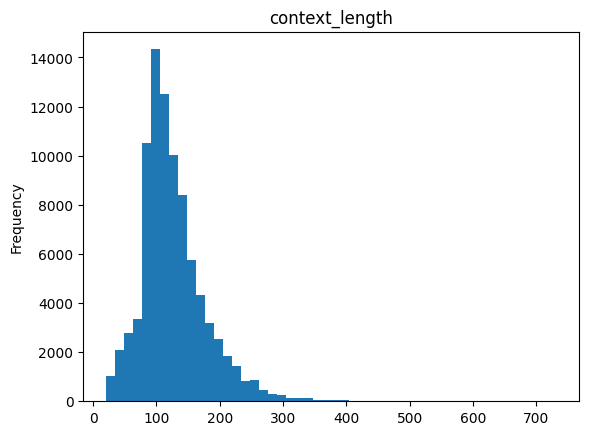

In [ ]:
# Transformando o dataset de treinamento em um dataframe Pandas
dataset_v1_pt_df = dataset_v1_pt["train"].to_pandas()
# Imprimindo o histograma de tokens do conjunto de treinamwento
dataset_v1_pt_df['context_length'].plot(kind='hist', bins=50, title='context_length')

# SQuAD v2.0



Conforme apresentado em [[3]](https://arxiv.org/pdf/1806.03822), um ponto negativo da 1ª versão do dataset SQuAD é que todas as questões são respondíveis por meio das declarações do contexto. Contudo, nos casos reais, nem sempre isso acontece, assim, os sistemas podem responder com suposições não confiáveis sobre questões para as quais a resposta correta não é declarada no contexto.

Neste sentido, a 2ª versão do dataset, proposta em 2018, combina os dados da 1ª versão SQuAD acrescido de mais 50.000 perguntas sem respostas contextuais.

Desta forma, agora o sistema não deve apenas responder a perguntas quando possível, mas também determinar quando a resposta não é suportada pelo contexto e abster-se em responder.

In [ ]:
# Carregando a 2ª versão do SQuAD (em inglês) do huggingface
!pip install datasets
from datasets import load_dataset
dataset_v2 = load_dataset('squad_v2')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

In [ ]:
dataset_v2

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 130319
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 11873
    })
})

## Lembrando que o dataset da versão 1.1 em pt possui os seguintes campos:
> trein_data.columns    
> Index(['Id', 'title', 'context', 'question', 'ans_start', 'text'], dtype='object')


In [ ]:
# Examinando uma amostra (32) aleatória dos dados
train_sample = dataset_v2["train"].shuffle(seed=42).select(range(32))
train_sample.to_pandas()

,id,title,context,question,answers
0,56e0f3907aa994140058e80a,Canon_law,The Roman Catholic Church canon law also inclu...,What term characterizes the intersection of th...,"{'text': ['full union'], 'answer_start': [104]}"
1,571adcf932177014007e9f56,Athanasius_of_Alexandria,Alexandria was the most important trade center...,What was Alexandria known for?,"{'text': ['important trade center'], 'answer_s..."
2,57325b9fe99e3014001e670c,Jehovah%27s_Witnesses,Former members Heather and Gary Botting compar...,How do the leaders of the Jehovah's Witnesses ...,{'text': ['disparaging individual decision-mak...
3,5728d8be4b864d1900164f6b,Estonia,"Historically, the cuisine of Estonia has been ...",What are the most common foods in Estonia?,"{'text': ['black bread, pork, potatoes, and da..."
4,56f6f5e1711bf01900a44898,Classical_music,Many of the instruments used to perform mediev...,What was the medieval flute made from?,"{'text': ['wood'], 'answer_start': [126]}"
5,5a36fffb95360f001af1b3c1,Gregorian_calendar,"Prior to 1917, Turkey used the lunar Islamic c...",What was used to set the year number?,"{'text': [], 'answer_start': []}"
6,5728fd38af94a219006a9edd,Samurai,Bushi was the name given to the ancient Japane...,Where did the imperial family live?,"{'text': ['Kyoto'], 'answer_start': [312]}"
7,5726c774f1498d1400e8eb0d,Utrecht,When the Frankish rulers established the syste...,What was part of the territory of bishopric,{'text': ['not only included the modern provin...
8,57264da2dd62a815002e8108,Department_store,A novelty shop called Au Bon Marché had been f...,What was the change in profit to Au Bon Marche...,"{'text': ['increased from 500,000 francs in 18..."
9,56fdeee819033b140034cde7,Computer,Machine languages and the assembly languages t...,An ARM architecture computer can be found in w...,"{'text': ['a PDA or a hand-held videogame'], '..."


### Quando a resposta está no contexto, o campo 'answers' apresenta em seus campos: 'text' a resposta e 'answer_start' o tokem de ínicio da resposta, ex.: **id 56e0f3907aa994140058e80a**

> **Contexto:** The Roman Catholic Church canon law also includes the main five rites (groups) of churches which are in full union with the Roman Catholic Church and the Supreme Pontiff

> **Questão:** What term characterizes the intersection of the rites with the Roman Catholic Church?

> **Resposta:** {'text': array(['full union'], dtype=object), 'answer_start': array([104], dtype=int32)

### Já quando a resposta não está no contexto, o campo 'answers' apresenta valores nulos em seus campos: 'text' e 'answer_start'. Ex.: **5a0803c33fc8740018207115**  

> **Contexto:** Earth's surface and the clouds absorb visible and invisible radiation from the sun and re-emit much of the energy as infrared back to atmosphere. Certain substances in the atmosphere, chiefly cloud droplets and water vapor, but also carbon dioxide, methane, nitrous oxide, sulfur hexafluoride, and chlorofluorocarbons, absorb this infrared, and re-radiate it in all directions including back to Earth. Thus, the greenhouse effect keeps the atmosphere and surface much warmer than if the infrared absorbers were absent from the atmosphere.  

> **Questão:** What substances emit water vapor back to the atmosphere?

> **Resposta:** {'text': array([ ], dtype=object), 'answer_start': array([ ], dtype=int32)}



In [ ]:
# Lista com todas as respostas (text & answer_start)
answers = dataset_v2["train"]['answers']

In [ ]:
# 1ª resposta
answers[0]['text']

['in the late 1990s']

In [ ]:
# Retirando os colchetes e aspas
str(answers[0]['text']).strip('[]').strip("'")

'in the late 1990s'

In [ ]:
# 1ª início de resposta
answers[0]['answer_start']

[269]

In [ ]:
# Retirando colchetes
str(answers[0]['answer_start']).strip('[]')

'269'

In [ ]:
# Limpando todos os colchetes e aspas das respostas
text = []
ans_start = []
for x in range(len(dataset_v2["train"]['answers'])):
  text.append(str(answers[x]['text']).strip('[]').strip("'"))
  ans_start.append(str(answers[x]['answer_start']).strip('[]'))
# Transformando em um dataframe
dataset_v2_df = dataset_v2["train"].to_pandas()
# Incorporando a coluna text no dataframe
dataset_v2_df['text'] = text
# Incorporando a coluna ans_start no dataframe
dataset_v2_df['ans_start'] = ans_start

In [ ]:
# Agora o  dataset em us da versão 2.0 possui os mesmos registros da versão 1.1. pt,
# contudo ainda é necessário excluir o campo 'answers' e acerta o id para Id.
# 'Id', 'title', 'context', 'question', 'ans_start', 'text'
dataset_v2_df.rename(columns={"id": "Id"}, inplace = True)
dataset_v2_df.drop(columns=['answers'], inplace=True)
dataset_v2_df.columns

Index(['Id', 'title', 'context', 'question', 'text', 'ans_start'], dtype='object')

In [ ]:
# Selecionamento 32 registros aleatórios para verificação se os campos text e ans_start estão certos
dataset_v2_df.sample(n=32)

,Id,title,context,question,text,ans_start
53918,5726e7ab708984140094d562,Korean_War,"The Chinese counterattacked in April 1951, wit...",How many armies did the Chinese use in the Fif...,three field armies,124
28599,5706cf6e0eeca41400aa0e56,Black_people,In 1978 Aboriginal writer Kevin Gilbert receiv...,What year was Gilbert awarded for his efforts?,1978,3
58218,5ad0b298645df0001a2d00a3,Department_store,Parkson enters by acquiring local brand Centro...,Where did Centro open it's first store of 2004?,,
43043,570e25b30dc6ce1900204dfd,Eritrea,"Additionally, owing to its colonial history, c...",What is Eritrea's popular alcoholic beverage M...,honey,827
45849,5ad2ab64d7d075001a429e67,Nintendo_Entertainment_System,"In the longer run, however, with the NES near ...",Who was an example of a 2nd party publisher?,,
56631,572742e2708984140094db8a,Mexico_City,"Mexico City has three zoos. Chapultepec Zoo, t...",When was the Chapultepec Zoo opened?,1924,201
99423,5a7c66e5e8bc7e001a9e1d73,Idealism,Idealism is a term with several related meanin...,What does the English word idein mean?,,
100012,5acd76f907355d001abf437d,Education,"University education includes teaching, resear...",What type of school is the Pennsylvania State ...,,
78961,5727d3e4ff5b5019007d9647,Eton_College,Numerous plays are put on every year at Eton C...,What is the name of Eton's largest theatre?,Farrer,92
84958,572809d54b864d19001642ba,European_Central_Bank,Although the ECB is governed by European law d...,How much does the ECB have as capital?,five billion euros,239


### Todos os 32 registros verificados estão corretos.   
Detalhe, os casos em que não há resposta, os campos text e ans_start não possuem valores.

In [ ]:
# Verificando o 'Id' que possui uma pergunta que a resposta está no contexto
dataset_v2_df[dataset_v2_df['Id'] == '5726e7ab708984140094d562']

,Id,title,context,question,text,ans_start
53918,5726e7ab708984140094d562,Korean_War,"The Chinese counterattacked in April 1951, wit...",How many armies did the Chinese use in the Fif...,three field armies,124


In [ ]:
# Verificando o 'Id' que possui uma pergunta que a resposta NÃO está no contexto
dataset_v2_df[dataset_v2_df['Id'] == '5a7a80f821c2de001afe9cac']

,Id,title,context,question,text,ans_start
85074,5a7a80f821c2de001afe9cac,European_Central_Bank,The bank must also co-operate within the EU an...,"Who rejected, along with the ECB, to use Term ...",,


In [ ]:
# Substituindo valores '' por NaN
import numpy as np
dataset_v2_df = dataset_v2_df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
# Verificando o 'Id' que possui uma pergunta que a resposta NÃO está no contexto
dataset_v2_df[dataset_v2_df['Id'] == '5a7a80f821c2de001afe9cac']

,Id,title,context,question,text,ans_start
85074,5a7a80f821c2de001afe9cac,European_Central_Bank,The bank must also co-operate within the EU an...,"Who rejected, along with the ECB, to use Term ...",NaN,NaN


In [ ]:
# Contando a quantidade de valores ausentes (NaN)
dataset_v2_df.isnull().sum()

Id               0
title            0
context          0
question         0
text         43498
ans_start    43498
dtype: int64

In [ ]:
len(dataset_v2_df)

130319

## Dos 130.319 resgistros do dataset de treinamento, 43.498 não possuem respostas

In [ ]:
# Salva arquivo no disco
dataset_v2_df.to_csv('squad_us2_train_.csv', encoding='utf-8', index = False)
!cp squad_us2_train_.csv "/content/drive/MyDrive/squad_pt/squad_us2_train_.csv"

### Ajustando o conjunto de validação

In [ ]:
dataset_v2["validation"]

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 11873
})

In [ ]:
# Limpando todos os colchetes e aspas das respostas
text = []
ans_start = []
for x in range(len(dataset_v2["validation"]['answers'])):
  text.append(str(answers[x]['text']).strip('[]').strip("'"))
  ans_start.append(str(answers[x]['answer_start']).strip('[]'))
# Transformando em um dataframe
dataset_v2_df = dataset_v2["validation"].to_pandas()
# Incorporando a coluna text no dataframe
dataset_v2_df['text'] = text
# Incorporando a coluna ans_start no dataframe
dataset_v2_df['ans_start'] = ans_start

In [ ]:
# Excluindo a coluna answers
dataset_v2_df.drop(columns=['answers'], inplace=True)
# Alterando de id para Id
dataset_v2_df.rename(columns={"id": "Id"}, inplace = True)
dataset_v2_df.columns

Index(['Id', 'title', 'context', 'question', 'text', 'ans_start'], dtype='object')

In [ ]:
# Substituindo valores '' por NaN
dataset_v2_df = dataset_v2_df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
# Contando a quantidade de valores ausentes (NaN)
dataset_v2_df.isnull().sum()

Id              0
title           0
context         0
question        0
text         2387
ans_start    2387
dtype: int64

In [ ]:
len(dataset_v2_df)

11873

### Dos 11.873 registros do conjunto de validação, 2387 não possuem respostas.

In [ ]:
# Salva arquivo no disco
dataset_v2_df.to_csv('squad_us2_valid_.csv', encoding='utf-8', index = False)
!cp squad_us2_valid_.csv "/content/drive/MyDrive/squad_pt/squad_us2_valid_.csv"

# Verificando o SQuAD v2.0 em Português no huggingface

In [ ]:
# Carregando a 2ª versão do SQuAD (em Português) do huggingface
#!pip install datasets
#from datasets import load_dataset
dataset_v2_pt = load_dataset("cjaniake/squad_v2_pt")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for cjaniake/squad_v2_pt contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/cjaniake/squad_v2_pt
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [ ]:
dataset_v2_pt

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'is_impossible', 'answers', 'plausible_answers'],
        num_rows: 130319
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'is_impossible', 'answers', 'plausible_answers'],
        num_rows: 11873
    })
})

Esta versão do dataset  encontrada ainda nos seguintes endereços:           
> https://github.com/cjaniake/squad_v2.0_pt/tree/master     
> https://github.com/piEsposito/br-quad-2.0   

Em ambos, não há mais detalhes referência a tradução para o pt

### Conforme saídas acima, ambas as versões 2.0  (inglês e português) possuem as mesmas quantidades de registros: 130.319 para o conjunto de treinamento e 11.873 para o de validação. Contudo, as features mudam um pouco.  

**Dataset em  inglês**    
> features: ['id', 'title', 'context', 'question', 'answers']   


**Dataset em português**    
> features: ['id', 'title', 'context', 'question', 'is_impossible', 'answers', 'plausible_answers']    


### Verificando os mesmos registros vistos na versão em inglês:

In [ ]:
# Transformando o dataset de treinamento em um dataframe Pandas
dataset_v2_pt_df = dataset_v2_pt["train"].to_pandas()

In [ ]:
# Verificando o 'id' que possui uma pergunta que a resposta está no contexto
dataset_v2_pt_df[dataset_v2_pt_df['id'] == '56e0f3907aa994140058e80a']

,id,title,context,question,is_impossible,answers,plausible_answers
16536,56e0f3907aa994140058e80a,Canon_law,A lei canônica da Igreja Católica Romana també...,Qual termo caracteriza a interseção dos ritos ...,False,"{'text': ['união com a'], 'answer_start': [120]}","{'text': [], 'answer_start': []}"


In [ ]:
# Verificando o 'id' que possui uma pergunta que a resposta NÃO está no contexto
dataset_v2_pt_df[dataset_v2_pt_df['id'] == '5a0803c33fc8740018207115']

,id,title,context,question,is_impossible,answers,plausible_answers
37459,5a0803c33fc8740018207115,Infrared,A superfície da Terra e as nuvens absorvem a r...,Quais substâncias emitem vapor de água de volt...,True,"{'text': [], 'answer_start': []}","{'text': ['absorvedores de infravermelho'], 'a..."


## Diferentemente da versão 2.0 do SQuAD em inglês, a versão 2 em pt possui os campos 'is_impossible' e 'plausible_answers'. Sendo que quando a resposta à pergunta não está no Contexto, a variável 'is_impossible' é setada em TRUE e o campo 'text' da variável 'plausible_answers' apresenta uma possível resposta.

## Será que o 'id' da versão 2.0 em português corresponde ao mesmo 'Id' da versão 1.1 no mesmo idioma?

In [ ]:
# Id 56e0f3907aa994140058e80a na versão 1.1 em pt
trein_data[trein_data['Id'] == '56e0f3907aa994140058e80a']

,Id,title,context,question,ans_start,text
15377,56e0f3907aa994140058e80a,Canon_law,O direito canônico da Igreja Católica Romana t...,Qual termo caracteriza a interseção dos ritos ...,118,união completa


In [ ]:
# Id 56e0f3907aa994140058e80a na versão 2.0 em pt
dataset_v2_pt_df[dataset_v2_pt_df['id'] == '56e0f3907aa994140058e80a']

,id,title,context,question,is_impossible,answers,plausible_answers
16536,56e0f3907aa994140058e80a,Canon_law,A lei canônica da Igreja Católica Romana també...,Qual termo caracteriza a interseção dos ritos ...,False,"{'text': ['união com a'], 'answer_start': [120]}","{'text': [], 'answer_start': []}"


### Os ids são correspondentes, contudo, a resposta da versão 1.1 parece fazer mais sentido!

> **Contexto versão 1.1:** O direito canônico da Igreja Católica Romana também inclui os cinco principais ritos (grupos) de igrejas que estão em união completa com a Igreja Católica Romana e o Sumo Pontífice.   
> **Contexto versão 2.0:** A lei canônica da Igreja Católica Romana também inclui os cinco principais ritos (grupos) de igrejas que estão em plena união com a Igreja Católica Romana e o Sumo Pontífice.

> **Questão versão 1.1:** Qual termo caracteriza a interseção dos ritos com a Igreja Católica Romana?	     
> **Questão versão 2.0:** Qual termo caracteriza a interseção dos ritos com a Igreja Católica Romana?     

> **Resposta versão 1.1:** união completa   
> **Resposta versão 2.0:** união com a  


### Verificando quantos tokens possuem o campo contexto da versão 2.0 em pt

In [ ]:
dataset_v2_pt = dataset_v2_pt.map(compute_context_length)

Map:   0%|          | 0/130319 [00:00<?, ? examples/s]

Map:   0%|          | 0/11873 [00:00<?, ? examples/s]

In [ ]:
# Transformando novamente o dataset de treinamento em um dataframe Pandas
dataset_v2_pt_df = dataset_v2_pt["train"].to_pandas()
# Inspecionando o id 56e0f3907aa994140058e80a
dataset_v2_pt_df[dataset_v2_pt_df['id'] == '56e0f3907aa994140058e80a']

,id,title,context,question,is_impossible,answers,plausible_answers,context_length
16536,56e0f3907aa994140058e80a,Canon_law,A lei canônica da Igreja Católica Romana també...,Qual termo caracteriza a interseção dos ritos ...,False,"{'text': ['união com a'], 'answer_start': [120]}","{'text': [], 'answer_start': []}",30


### Conforme saída acima, o campo context_lenght da versão 2.0 em pt é 30, valor idêntido ao da versão 1.1 no mesmo idioma. Desta forma, as versões 1.1 e 2.0 em pt parecem estar alinhadas.


In [ ]:
# Quantos questões possuem e não possuem respostas
dataset_v2_pt_df['is_impossible'].value_counts()

False    86821
True     43498
Name: is_impossible, dtype: int64

In [ ]:
len(dataset_v2_pt_df)

130319

# Questões: 130.319
> sem respostas: 43.498           
> com respostas: 86.821

## Conforme saída acima, o conjunto de treinamento possui:   
> 33,3% (43.498) dos dados com perguntas sem respostas; e    
> 66,7% (86.821) dos dados com perguntas com respostas.    

Os resultados estão idênticos ao dataset em inglês

In [ ]:
# Verificando no conjunto de validação
dataset_v2_pt_df = dataset_v2_pt["validation"].to_pandas()
dataset_v2_pt_df['is_impossible'].value_counts()

True     5945
False    5928
Name: is_impossible, dtype: int64

## Conforme saída acima, o conjunto de validação possui:   
> 50,1% (5.945) dos dados com perguntas sem respostas; e    
> 49,9% (5.928) dos dados com perguntas com respostas.   

 **Os valores não batem com o dataset em inglês, onde:**
 >"[...] Dos 11.873 registros do conjunto de validação, 2387 não possuem respostas".

In [ ]:
# Carregando a versão 2.0 em pt do dataset de validação
dataset_v2_pt_df = dataset_v2_pt["validation"].to_pandas()

In [ ]:
# Gerando uma amostra aleatória de 12 elementos do dataset
dataset_v2_pt_df.sample(n=12, random_state=42).head(12)

,id,title,context,question,is_impossible,answers,plausible_answers,context_length
11526,57373f80c3c5551400e51e91,Force,As deficiências da física aristotélica não ser...,O que os objetos em movimento forçado continha...,False,"{'text': [''], 'answer_start': [-1]}","{'text': [], 'answer_start': []}",99
10439,5730a0778ab72b1400f9c60b,Imperialism,O conceito determinismo ambiental serviu como ...,O que foi pensado para decidir o comportamento...,False,"{'text': ['o ambiente em que viviam'], 'answer...","{'text': [], 'answer_start': []}",93
8788,57297bc9af94a219006aa4c8,Prime_number,O método mais básico de verificar a primalidad...,O que torna o método de divisão de testes mais...,False,{'text': ['da uma lista completa de números pr...,"{'text': [], 'answer_start': []}",168
2473,5ad24ff3d7d075001a428ca6,Oxygen,O oxigênio é o elemento químico mais abundante...,"O que compõe 49,2% da massa do sol?",True,"{'text': [], 'answer_start': []}","{'text': ['oxigênio.'], 'answer_start': [238]}",155
2184,5ad40864604f3c001a3ffeee,Steam_engine,É possível usar um mecanismo baseado em um mot...,O que não é um problema?,True,"{'text': [], 'answer_start': []}","{'text': ['dificuldade de vedar os rotores'], ...",124
4894,5a57cf7a770dc0001aeefda5,Geology,Os sismólogos podem usar o horário de chegada ...,O que as tomografias levam a médicos e seus pa...,True,"{'text': [], 'answer_start': []}","{'text': ['uma visão muito mais detalhada'], '...",151
8543,57293e983f37b3190047818b,Intergovernmental_Panel_on_Climate_Change,"Em 2001, 16 academias nacionais de ciências em...",Quando foi emitida a declaração conjunta sobre...,False,"{'text': ['2001,'], 'answer_start': [3]}","{'text': [], 'answer_start': []}",189
8062,5ad4a682ba00c4001a268eca,Immune_system,A imunidade inata e a adaptativa dependem da c...,O que não depende da capacidade do sistema imu...,True,"{'text': [], 'answer_start': []}","{'text': ['imunidade inata'], 'answer_start': ...",85
11137,5ad3a21d604f3c001a3fea21,French_and_Indian_War,O resultado foi um dos desenvolvimentos mais s...,Qual foi o significado da perda britânica?,True,"{'text': [], 'answer_start': []}",{'text': ['confirmando a posição da Grã-Bretan...,99
11528,57373f80c3c5551400e51e93,Force,As deficiências da física aristotélica não ser...,Que força agiu sobre os corpos para retardar s...,False,"{'text': ['atrito.'], 'answer_start': [616]}","{'text': [], 'answer_start': []}",99


In [ ]:
dataset_v2_pt_df.columns

Index(['id', 'title', 'context', 'question', 'is_impossible', 'answers',
       'plausible_answers', 'context_length'],
      dtype='object')

In [ ]:
# Lista com todas as respostas (text & answer_start)
answers = dataset_v2_pt["validation"]['answers']

In [ ]:
# Limpando todos os colchetes e aspas das respostas
text = []
ans_start = []
for x in range(len(dataset_v2_pt["validation"]['answers'])):
  text.append(str(answers[x]['text']).strip('[]').strip("'"))
  ans_start.append(str(answers[x]['answer_start']).strip('[]'))
# Incorporando a coluna text no dataframe
dataset_v2_pt_df['text'] = text
# Incorporando a coluna ans_start no dataframe
dataset_v2_pt_df['ans_start'] = ans_start
# Alterado do id para Id, conforme versão 1.1 em pt
dataset_v2_pt_df.rename(columns={"id": "Id"}, inplace = True)

In [ ]:
dataset_v2_pt_df.columns

Index(['Id', 'title', 'context', 'question', 'is_impossible', 'answers',
       'plausible_answers', 'context_length', 'text', 'ans_start'],
      dtype='object')

In [ ]:
# Substituindo valores '' por NaN
dataset_v2_pt_df = dataset_v2_pt_df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
# Contando a quantidade de valores ausentes (NaN)
dataset_v2_pt_df.isnull().sum()

Id                      0
title                   0
context                 0
question                0
is_impossible           0
answers                 0
plausible_answers       0
context_length          0
text                 6058
ans_start            5945
dtype: int64

Lembrando que as questões sem respostas possuem simultaneamente os campos text e ans_start vazios, e neste caso a variável is_impossible é setada em TRUE. Portando, conforme já apresentado, o dataset de validação possui 5945 questões sem respostas. **O que não bate com o dataset em inglês, onde:**
 >"[...] Dos 11.873 registros do conjunto de validação, 2387 não possuem respostas".

In [ ]:
# Contando as quantidades de True e False na variável 'is_impossible'
dataset_v2_pt_df['is_impossible'].value_counts()

True     5945
False    5928
Name: is_impossible, dtype: int64

In [ ]:
# Inspecionando uma amostra aleatória
dataset_v2_pt_df.sample(n=12, random_state=42).head(12)

,Id,title,context,question,is_impossible,answers,plausible_answers,context_length,text,ans_start
11526,57373f80c3c5551400e51e91,Force,As deficiências da física aristotélica não ser...,O que os objetos em movimento forçado continha...,False,"{'text': [''], 'answer_start': [-1]}","{'text': [], 'answer_start': []}",99,,-1
10439,5730a0778ab72b1400f9c60b,Imperialism,O conceito determinismo ambiental serviu como ...,O que foi pensado para decidir o comportamento...,False,"{'text': ['o ambiente em que viviam'], 'answer...","{'text': [], 'answer_start': []}",93,o ambiente em que viviam,178
8788,57297bc9af94a219006aa4c8,Prime_number,O método mais básico de verificar a primalidad...,O que torna o método de divisão de testes mais...,False,{'text': ['da uma lista completa de números pr...,"{'text': [], 'answer_start': []}",168,da uma lista completa de números primos - as,609
2473,5ad24ff3d7d075001a428ca6,Oxygen,O oxigênio é o elemento químico mais abundante...,"O que compõe 49,2% da massa do sol?",True,"{'text': [], 'answer_start': []}","{'text': ['oxigênio.'], 'answer_start': [238]}",155,,
2184,5ad40864604f3c001a3ffeee,Steam_engine,É possível usar um mecanismo baseado em um mot...,O que não é um problema?,True,"{'text': [], 'answer_start': []}","{'text': ['dificuldade de vedar os rotores'], ...",124,,
4894,5a57cf7a770dc0001aeefda5,Geology,Os sismólogos podem usar o horário de chegada ...,O que as tomografias levam a médicos e seus pa...,True,"{'text': [], 'answer_start': []}","{'text': ['uma visão muito mais detalhada'], '...",151,,
8543,57293e983f37b3190047818b,Intergovernmental_Panel_on_Climate_Change,"Em 2001, 16 academias nacionais de ciências em...",Quando foi emitida a declaração conjunta sobre...,False,"{'text': ['2001,'], 'answer_start': [3]}","{'text': [], 'answer_start': []}",189,"2001,",3
8062,5ad4a682ba00c4001a268eca,Immune_system,A imunidade inata e a adaptativa dependem da c...,O que não depende da capacidade do sistema imu...,True,"{'text': [], 'answer_start': []}","{'text': ['imunidade inata'], 'answer_start': ...",85,,
11137,5ad3a21d604f3c001a3fea21,French_and_Indian_War,O resultado foi um dos desenvolvimentos mais s...,Qual foi o significado da perda britânica?,True,"{'text': [], 'answer_start': []}",{'text': ['confirmando a posição da Grã-Bretan...,99,,
11528,57373f80c3c5551400e51e93,Force,As deficiências da física aristotélica não ser...,Que força agiu sobre os corpos para retardar s...,False,"{'text': ['atrito.'], 'answer_start': [616]}","{'text': [], 'answer_start': []}",99,atrito.,616


### Verificando a amostra acima, a conversão foi feita corretamente.

Um detalhe é o Id '57373f80c3c5551400e51e91' que apesar de ter a variável '57373f80c3c5551400e51e91' setada em False, o campo 'text' está vazio e o 'answer_start' é -1.

Verificando o mesmo id para a versão 1.1 em pt



In [ ]:
# Verificando se o conjunto de treinamento possui o  Id '57373f80c3c5551400e51e91'
trein_data[trein_data['Id'] == '57373f80c3c5551400e51e91']

,Id,title,context,question,ans_start,text


### O conjunto de treinamento não possui o Id '57373f80c3c5551400e51e91'


In [ ]:
# Verificando se o conjunto de validação possui o  Id '57373f80c3c5551400e51e91'
valid_data[valid_data['Id'] == '57373f80c3c5551400e51e91']

,Id,title,context,question,ans_start,text
33880,57373f80c3c5551400e51e91,Force,As deficiências da física aristotélica não ser...,O que os objetos em movimento forçado continha...,458,gravidade
33881,57373f80c3c5551400e51e91,Force,As deficiências da física aristotélica não ser...,O que os objetos em movimento forçado continha...,217,uma força inata de ímpeto
34582,57373f80c3c5551400e51e91,Force,As deficiências da física aristotélica não ser...,O que os objetos em movimento forçado continha...,236,impulso
34583,57373f80c3c5551400e51e91,Force,As deficiências da física aristotélica não ser...,O que os objetos em movimento forçado continha...,221,força inata do ímpeto


### O conjunto de validação possui **quatro** registros com  Id '57373f80c3c5551400e51e91'

In [ ]:
# Verificando a quantidade de 'Id' que se repetem
#import pandas as pd
pd.DataFrame(valid_data['Id'].value_counts()).sort_values(by='Id', ascending=False)

,Id
5733d3cb4776f419006612eb,5
5733d13e4776f419006612c6,5
573085ea8ab72b1400f9c550,5
5733f309d058e614000b664a,5
5733eb34d058e614000b65ce,5
...,...
56f7ffadaef2371900625d5f,1
56f80143aef2371900625d6a,1
56f802c6a6d7ea1400e17377,1
56f802c6a6d7ea1400e17378,1


In [ ]:
# Verificando se o conjunto de validação possui o  Id '5733d3cb4776f419006612eb'
valid_data[valid_data['Id'] == '5733d3cb4776f419006612eb']

,Id,title,context,question,ans_start,text
33030,5733d3cb4776f419006612eb,French_and_Indian_War,O conflito é conhecido por vários nomes. Na Am...,Qual é a confusão da guerra francesa e indiana?,502,índios terem lutado nos dois lados do conflito...
33031,5733d3cb4776f419006612eb,French_and_Indian_War,O conflito é conhecido por vários nomes. Na Am...,Qual é a confusão da guerra francesa e indiana?,502,índios terem lutado nos dois lados do conflito
33032,5733d3cb4776f419006612eb,French_and_Indian_War,O conflito é conhecido por vários nomes. Na Am...,Qual é a confusão da guerra francesa e indiana?,479,obscurece o fato de os índios terem lutado nos...
33033,5733d3cb4776f419006612eb,French_and_Indian_War,O conflito é conhecido por vários nomes. Na Am...,Qual é a confusão da guerra francesa e indiana?,575,Guerra dos Sete Anos
33034,5733d3cb4776f419006612eb,French_and_Indian_War,O conflito é conhecido por vários nomes. Na Am...,Qual é a confusão da guerra francesa e indiana?,479,obscurece o fato de os índios terem lutado nos...


In [ ]:
# Quantidade de registros no dataset de validação da versão 1.1 pt
len(valid_data)

17853

In [ ]:
# Quantidade de Ids únicos
valid_data['Id'].nunique()

10570

Dos 17.853 registros do conjunto de validação da versão 1.1 pt, 10.570 são únicos.

In [ ]:
# Quantidade de registros no dataset de treinamento da versão 1.1 pt
len(trein_data['Id'])

87510

In [ ]:
# Quantidade de registros únicos no dataset de treinamento da versão 1.1 pt
trein_data['Id'].nunique()

87510

O dataset de treinamento da versão 1.1 pt não possui nenhum Id repetido

In [ ]:
# Verificando se os ids da versão 2.0 pt de treinamento são únicos
dataset_v2_pt["train"].to_pandas()['id'].nunique()

130319

In [ ]:
# Verificando se os ids da versão 2.0 pt de validação são únicos
dataset_v2_pt["validation"].to_pandas()['id'].nunique()

11873

Todos os registros dos conjuntos de treinamento e validação da versão 2.0 pt são únicos

In [ ]:
# Verificando se os ids da versão 2.0 us de treinamento são únicos
dataset_v2["train"].to_pandas()['id'].nunique()

130319

In [ ]:
# Verificando se os ids da versão 2.0 us de validação são únicos
dataset_v2["validation"].to_pandas()['id'].nunique()

11873

Todos os registros dos conjuntos de treinamento e validação da versão 2.0 us são únicos

## Somente o conjunto de validação da versão 1.1 pt possui Ids duplicados.   
Carregaremos outra versão 1.1 pt diretamente do hunggingface para verificar se a duplicidade dos Ids se deu por algum erro na importanção do conjunto de dados original em json ou é mesmo uma característica da base de dados em questão

In [ ]:
#!pip install datasets
from datasets import load_dataset
dataset = load_dataset("tgsc/squad-pt-v1.1")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/87510 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87510
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

### Conforme saídas acima, o conjunto de validação possui 10.570 registros. Diferentemente da versão importada via arquivos json (squad-dev-v1.1.json) que possí 17.853 registros.

Conforme [[3]](https://arxiv.org/pdf/1806.03822), os datasets possuem as seguintes características:

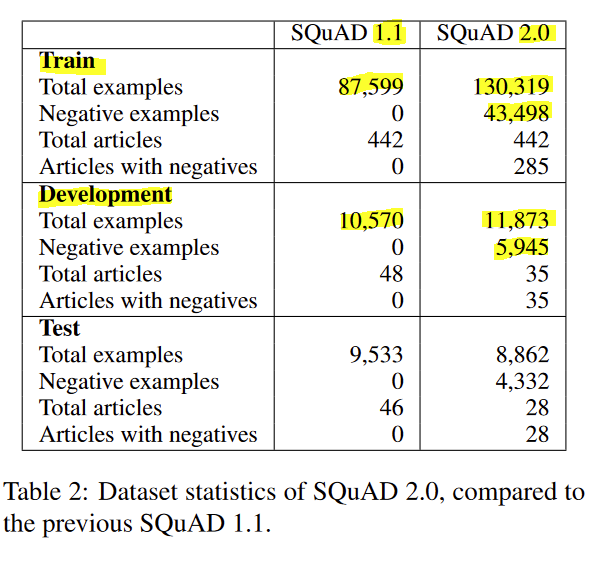

Assim, realmente a quantidade de registros (17.853) do conjunto de validação da versão 1.1 pt, importada via arquivos json (squad-dev-v1.1.json), está errada.


In [ ]:
trein_data = squad_utils_v1.json_to_dataframe('squad-train-v1.1.json')
valid_data = squad_utils_v1.json_to_dataframe('squad-dev-v1.1.json')

In [ ]:
import json

# Opening JSON file
f = open('squad-dev-v1.1.json')

# returns JSON object as
# a dictionary
data = json.load(f)

# Iterating through the json
# list
for i in data['data']:
	print(i)

# Closing file
f.close()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Abrindo o arquivo <squad-dev-v1.1.json> e pesquisando por um id que possui mais de um registro, ex.: 5733d3cb4776f419006612eb, temos:

type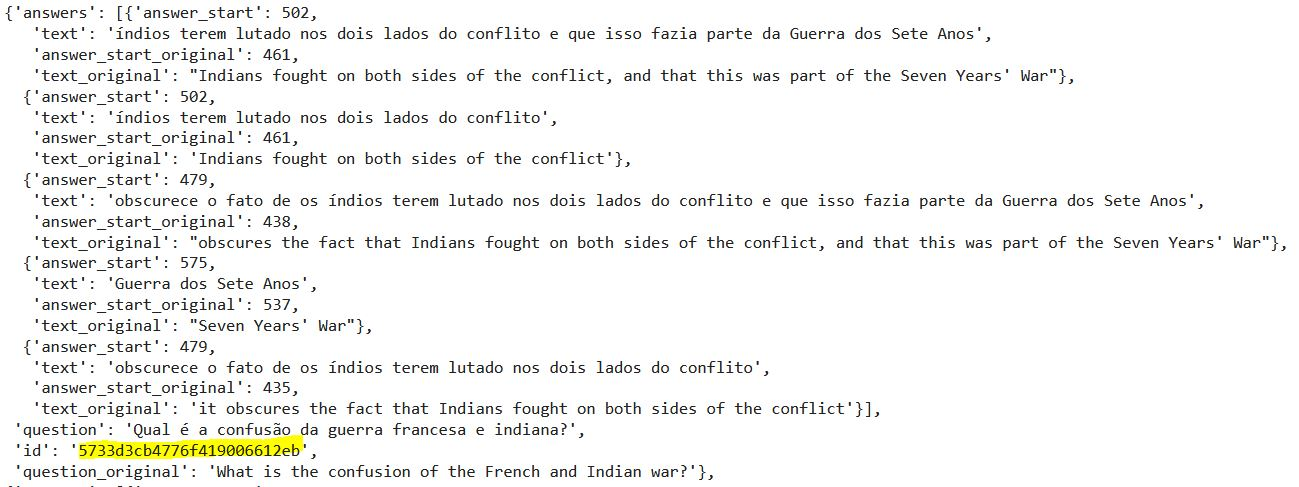

E comparando com o resultado obtido na importação ...

In [ ]:
# Verificando se o conjunto de validação possui o  Id '5733d3cb4776f419006612eb'
valid_data[valid_data['Id'] == '5733d3cb4776f419006612eb']

,Id,title,context,question,ans_start,text
33030,5733d3cb4776f419006612eb,French_and_Indian_War,O conflito é conhecido por vários nomes. Na Am...,Qual é a confusão da guerra francesa e indiana?,502,índios terem lutado nos dois lados do conflito...
33031,5733d3cb4776f419006612eb,French_and_Indian_War,O conflito é conhecido por vários nomes. Na Am...,Qual é a confusão da guerra francesa e indiana?,502,índios terem lutado nos dois lados do conflito
33032,5733d3cb4776f419006612eb,French_and_Indian_War,O conflito é conhecido por vários nomes. Na Am...,Qual é a confusão da guerra francesa e indiana?,479,obscurece o fato de os índios terem lutado nos...
33033,5733d3cb4776f419006612eb,French_and_Indian_War,O conflito é conhecido por vários nomes. Na Am...,Qual é a confusão da guerra francesa e indiana?,575,Guerra dos Sete Anos
33034,5733d3cb4776f419006612eb,French_and_Indian_War,O conflito é conhecido por vários nomes. Na Am...,Qual é a confusão da guerra francesa e indiana?,479,obscurece o fato de os índios terem lutado nos...


## Realmente o id em questão possui 5 registros 😯

### Qual utilizar como verdadeiro?

#### Vamos verificar o id '5733d3cb4776f419006612eb', na com a outra versão 1.1 pt baixada do hunggingface "tgsc/squad-pt-v1.1"

In [ ]:
# Verificando o id '5733d3cb4776f419006612eb' da versão 1.1 pt ("tgsc/squad-pt-v1.1") do hungginface
dataset['validation'].to_pandas()[dataset['validation'].to_pandas()['id'] == '5733d3cb4776f419006612eb']

,id,title,context,question,answers
368,5733d3cb4776f419006612eb,French_and_Indian_War,O conflito é conhecido por vários nomes. Na Am...,Qual é a confusão da guerra francesa e indiana?,"{'answer_start': [502, 502, 479, 575, 479], 't..."


### Bingo!
Realmente o dataset de validação da versão 1.1 tem um problema de várias respostas para  uma mesma pergunta com um mesmo contexto.

# Vamos excluir os registros duplicados - mantendo só os primeiros - do conjunto de validação da versão 1.1 pt importada via arquivos json (squad-dev-v1.1.json)


In [ ]:
# Contando a quantidade de valores
valid_data.count()

Id           17853
title        17853
context      17853
question     17853
ans_start    17853
text         17853
dtype: int64

In [ ]:
# Registros únicos
valid_data.nunique()

Id           10570
title           48
context       5644
question     10521
ans_start     1344
text         14545
dtype: int64

In [ ]:
# Exclui os registros duplicados mantendo só os primeiros
valid_data = valid_data.drop_duplicates(subset='Id', keep='first')

In [ ]:
# Quantidade de registros
len(valid_data)

10570

In [ ]:
# Quantidade de registros únicos
valid_data.nunique()

Id           10570
title           48
context       5644
question     10521
ans_start     1344
text         14545
dtype: int64

In [ ]:
# Verificando se o conjunto de validação possui o  Id '5733d3cb4776f419006612eb'
valid_data_[valid_data['Id'] == '5733d3cb4776f419006612eb']

<ipython-input-30-2e9154f2db7a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  valid_data_[valid_data['Id'] == '5733d3cb4776f419006612eb']


,Id,title,context,question,ans_start,text
33030,5733d3cb4776f419006612eb,French_and_Indian_War,O conflito é conhecido por vários nomes. Na Am...,Qual é a confusão da guerra francesa e indiana?,502,índios terem lutado nos dois lados do conflito...


## Vamos refazer as duas estratégias utilizadas no início desta análise a atualizar os arquivos no hunggingface

## 1ª Estratégia - Reajustando o dataset

In [ ]:
# Unindo os datasets de treinamento e validação
dataset = pd.concat([trein_data, valid_data])
# 80% Treinamento, 10% Validação e 10% Testes
import numpy as np
train, validate, test = np.split(dataset.sample(frac=1, random_state=42),[int(.8*len(dataset)), int(.9*len(dataset))])

In [ ]:
# Salva arquivo no disco
train.to_csv('squad_BR_train.csv', encoding='utf-8', index = False)
!cp squad_BR_train.csv "/content/drive/MyDrive/squad_pt/squad_BR_train.csv"
validate.to_csv('squad_BR_valid.csv', encoding='utf-8', index = False)
!cp squad_BR_valid.csv "/content/drive/MyDrive/squad_pt/squad_BR_valid.csv"
test.to_csv('squad_BR_test.csv', encoding='utf-8', index = False)
!cp squad_BR_test.csv "/content/drive/MyDrive/squad_pt/squad_BR_test.csv"

## Os 3 arquivos foram atualizados no [Hungginface](https://huggingface.co/datasets/vsvasconcelos/SQuAD-pt_BR-V1.1)

In [ ]:
dataset_v1_pt = load_dataset("vsvasconcelos/SQuAD-pt_BR-V1.1")
dataset_v1_pt

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 78464
    })
    validation: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 9808
    })
    test: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 9808
    })
})

## 2ª Estratégia - Reajustando os dados de validação

In [ ]:
# O dataset de treinamento é preservado!
train = trein_data
# Pegando as 1ª 7K linhas para validação
validate = valid_data[:5500]
# Pegando o restante dos dados originais de validação para testes
test = valid_data[5500:]

In [ ]:
total_dados = len(train) + len(validate) + len(test)
print("Total de dados: ", total_dados)
print("Percentual de dados treinamento: ", round(len(train)/total_dados*100,2))
print("Percentual de dados validação: ", round(len(validate)/total_dados*100,2))
print("Percentual de dados de testes: ", round(len(test)/total_dados*100,2))

Total de dados:  98080
Percentual de dados treinamento:  89.22
Percentual de dados validação:  5.61
Percentual de dados de testes:  5.17


In [ ]:
# Salva arquivo no disco
train.to_csv('squad_BR_train_.csv', encoding='utf-8', index = False)
!cp squad_BR_train_.csv "/content/drive/MyDrive/squad_pt/squad_BR_train_.csv"
validate.to_csv('squad_BR_valid_.csv', encoding='utf-8', index = False)
!cp squad_BR_valid_.csv "/content/drive/MyDrive/squad_pt/squad_BR_valid_.csv"
test.to_csv('squad_BR_test_.csv', encoding='utf-8', index = False)
!cp squad_BR_test_.csv "/content/drive/MyDrive/squad_pt/squad_BR_test_.csv"

### Os 3 arquivos csv gerados foram atualizados no [hunggingface](https://huggingface.co/datasets/vsvasconcelos/SQuAD-pt_BR-V1.1_)

In [ ]:
dataset_v1_pt_ = load_dataset("vsvasconcelos/SQuAD-pt_BR-V1.1_")
dataset_v1_pt_

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 87510
    })
    validation: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 5500
    })
    test: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 5070
    })
})